In [60]:
# API
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15', #5000
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '620f8801-24c1-4cfa-8a8e-1c8f8a0b9a66',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2024-08-28T19:36:06.251Z', 'error_code': 0, 'error_message': None, 'elapsed': 35, 'credit_count': 1, 'notice': None, 'total_count': 9997}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11653, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [62]:
type(data)

dict

In [64]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [66]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11653,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.974640e+07,1.974640e+07,False,NaN,1,NaN,NaN,None,2024-08-28T19:35:00.000Z,59267.904339,4.763062e+10,54.1567,0.357074,-4.543057,-3.144435,-12.056372,-2.587824,-14.121316,1.170328e+12,55.9895,1.244626e+12,None,2024-08-28T19:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:36:19.440311
1,1027,Ethereum,ETH,ethereum,9253,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202987e+08,1.202987e+08,True,NaN,2,NaN,NaN,None,2024-08-28T19:34:00.000Z,2518.119064,2.338354e+10,67.1962,-0.232666,-2.685265,-4.562158,-23.934261,-25.462554,-33.543257,3.029265e+11,14.4923,3.029265e+11,None,2024-08-28T19:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:36:19.440311
2,825,Tether USDt,USDT,tether,95806,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.180393e+11,1.202563e+11,True,NaN,3,NaN,NaN,None,2024-08-28T19:34:00.000Z,1.000126,8.024461e+10,50.4684,-0.033243,0.018065,-0.072136,0.023170,0.149389,0.025180,1.180542e+11,5.6465,1.202714e+11,None,2024-08-28T19:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-28 14:36:19.440311
3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459352e+08,1.459352e+08,False,NaN,4,NaN,NaN,None,2024-08-28T19:34:00.000Z,536.305106,2.002916e+09,12.3069,0.453372,-2.294667,-5.399734,-7.169544,-5.873150,-10.527369,7.826577e+10,3.7414,7.826577e+10,None,2024-08-28T19:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:36:19.440311
4,5426,Solana,SOL,solana,722,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.661541e+08,5.831964e+08,True,NaN,5,NaN,NaN,None,2024-08-28T19:34:00.000Z,145.412454,3.457174e+09,56.7524,1.273815,-6.104808,1.996248,-21.856473,3.013690,-14.495441,6.778461e+10,3.2403,8.480403e+10,None,2024-08-28T19:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:36:19.440311
5,3408,USDC,USDC,usd-coin,21765,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.442295e+10,3.442295e+10,False,NaN,6,NaN,NaN,None,2024-08-28T19:34:00.000Z,1.000001,8.675949e+09,56.7391,-0.016952,0.008070,0.002423,0.000968,-0.019489,-0.012789,3.442299e+10,1.6464,3.442299e+10,None,2024-08-28T19:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-28 14:36:19.440311
6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.618009e+10,9.998732e+10,False,NaN,7,NaN,NaN,None,2024-08-28T19:35:00.000Z,0.574817,1.697572e+09,56.2136,0.675424,-3.200710,-4.635636,-4.769369,21.345422,9.577192,3.229325e+10,1.5446,5.748167e+10,None,2024-08-28T19:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:36:19.440311
7,74,Dogecoin,DOGE,dogecoin,1049,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.457245e+11,1.457245e+11,True,NaN,8,NaN,NaN,None,2024-08-28T19:35:00.000Z,0.099692,7.895491e+08,62.7670,-0.059721,-4.571374,-5.775132,-22.882307,-18.442683,-38.594149,1.452759e+10,0.6948,1.452759e+10,None,2024-08-28T19:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:36:19.440311
8,11419,Toncoin,TON,toncoin,539,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2

In [77]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '620f8801-24c1-4cfa-8a8e-1c8f8a0b9a66',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    # df = df.append(df2)
    df = pd.concat([df, df2])
    # df

    # if not os.path.isfile(r'pandas/API.csv'):
    #     df.to_csv(r'API.csv', header='column_names')
    # else:
    #     df.to_csv(r'API.csv', mode='a', header=False)
    



In [79]:
# automate
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) # sleep for 1 minute
exit()

API Runner completed
API Runner completed



KeyboardInterrupt



In [73]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11653,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.974640e+07,1.974640e+07,False,NaN,1,NaN,NaN,None,2024-08-28T19:35:00.000Z,59267.904339,4.763062e+10,54.1567,0.357074,-4.543057,-3.144435,-12.056372,-2.587824,-14.121316,1.170328e+12,55.9895,1.244626e+12,None,2024-08-28T19:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:36:19.440311
1,1027,Ethereum,ETH,ethereum,9253,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202987e+08,1.202987e+08,True,NaN,2,NaN,NaN,None,2024-08-28T19:34:00.000Z,2518.119064,2.338354e+10,67.1962,-0.232666,-2.685265,-4.562158,-23.934261,-25.462554,-33.543257,3.029265e+11,14.4923,3.029265e+11,None,2024-08-28T19:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:36:19.440311
2,825,Tether USDt,USDT,tether,95806,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.180393e+11,1.202563e+11,True,NaN,3,NaN,NaN,None,2024-08-28T19:34:00.000Z,1.000126,8.024461e+10,50.4684,-0.033243,0.018065,-0.072136,0.023170,0.149389,0.025180,1.180542e+11,5.6465,1.202714e+11,None,2024-08-28T19:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-28 14:36:19.440311
3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459352e+08,1.459352e+08,False,NaN,4,NaN,NaN,None,2024-08-28T19:34:00.000Z,536.305106,2.002916e+09,12.3069,0.453372,-2.294667,-5.399734,-7.169544,-5.873150,-10.527369,7.826577e+10,3.7414,7.826577e+10,None,2024-08-28T19:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:36:19.440311
4,5426,Solana,SOL,solana,722,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.661541e+08,5.831964e+08,True,NaN,5,NaN,NaN,None,2024-08-28T19:34:00.000Z,145.412454,3.457174e+09,56.7524,1.273815,-6.104808,1.996248,-21.856473,3.013690,-14.495441,6.778461e+10,3.2403,8.480403e+10,None,2024-08-28T19:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:36:19.440311
5,3408,USDC,USDC,usd-coin,21765,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.442295e+10,3.442295e+10,False,NaN,6,NaN,NaN,None,2024-08-28T19:34:00.000Z,1.000001,8.675949e+09,56.7391,-0.016952,0.008070,0.002423,0.000968,-0.019489,-0.012789,3.442299e+10,1.6464,3.442299e+10,None,2024-08-28T19:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-28 14:36:19.440311
6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.618009e+10,9.998732e+10,False,NaN,7,NaN,NaN,None,2024-08-28T19:35:00.000Z,0.574817,1.697572e+09,56.2136,0.675424,-3.200710,-4.635636,-4.769369,21.345422,9.577192,3.229325e+10,1.5446,5.748167e+10,None,2024-08-28T19:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:36:19.440311
7,74,Dogecoin,DOGE,dogecoin,1049,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.457245e+11,1.457245e+11,True,NaN,8,NaN,NaN,None,2024-08-28T19:35:00.000Z,0.099692,7.895491e+08,62.7670,-0.059721,-4.571374,-5.775132,-22.882307,-18.442683,-38.594149,1.452759e+10,0.6948,1.452759e+10,None,2024-08-28T19:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:36:19.440311
8,11419,Toncoin,TON,toncoin,539,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2

In [81]:
df3 = pd.read_csv(r'API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11653,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.974640e+07,1.974640e+07,False,NaN,1,NaN,NaN,NaN,2024-08-28T19:35:00.000Z,59267.904339,4.763062e+10,54.1567,0.357074,-4.543057,-3.144435,-12.056372,-2.587824,-14.121316,1.170328e+12,55.9895,1.244626e+12,NaN,2024-08-28T19:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:36:19.440311
1,1,1027,Ethereum,ETH,ethereum,9253,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202987e+08,1.202987e+08,True,NaN,2,NaN,NaN,NaN,2024-08-28T19:34:00.000Z,2518.119064,2.338354e+10,67.1962,-0.232666,-2.685265,-4.562158,-23.934261,-25.462554,-33.543257,3.029265e+11,14.4923,3.029265e+11,NaN,2024-08-28T19:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:36:19.440311
2,2,825,Tether USDt,USDT,tether,95806,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.180393e+11,1.202563e+11,True,NaN,3,NaN,NaN,NaN,2024-08-28T19:34:00.000Z,1.000126,8.024461e+10,50.4684,-0.033243,0.018065,-0.072136,0.023170,0.149389,0.025180,1.180542e+11,5.6465,1.202714e+11,NaN,2024-08-28T19:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-28 14:36:19.440311
3,3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459352e+08,1.459352e+08,False,NaN,4,NaN,NaN,NaN,2024-08-28T19:34:00.000Z,536.305106,2.002916e+09,12.3069,0.453372,-2.294667,-5.399734,-7.169544,-5.873150,-10.527369,7.826577e+10,3.7414,7.826577e+10,NaN,2024-08-28T19:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:36:19.440311
4,4,5426,Solana,SOL,solana,722,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.661541e+08,5.831964e+08,True,NaN,5,NaN,NaN,NaN,2024-08-28T19:34:00.000Z,145.412454,3.457174e+09,56.7524,1.273815,-6.104808,1.996248,-21.856473,3.013690,-14.495441,6.778461e+10,3.2403,8.480403e+10,NaN,2024-08-28T19:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:36:19.440311
5,5,3408,USDC,USDC,usd-coin,21765,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.442295e+10,3.442295e+10,False,NaN,6,NaN,NaN,NaN,2024-08-28T19:34:00.000Z,1.000001,8.675949e+09,56.7391,-0.016952,0.008070,0.002423,0.000968,-0.019489,-0.012789,3.442299e+10,1.6464,3.442299e+10,NaN,2024-08-28T19:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-28 14:36:19.440311
6,6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.618009e+10,9.998732e+10,False,NaN,7,NaN,NaN,NaN,2024-08-28T19:35:00.000Z,0.574817,1.697572e+09,56.2136,0.675424,-3.200710,-4.635636,-4.769369,21.345422,9.577192,3.229325e+10,1.5446,5.748167e+10,NaN,2024-08-28T19:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:36:19.440311
7,7,74,Dogecoin,DOGE,dogecoin,1049,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.457245e+11,1.457245e+11,True,NaN,8,NaN,NaN,NaN,2024-08-28T19:35:00.000Z,0.099692,7.895491e+08,62.7670,-0.059721,-4.571374,-5.775132,-22.882307,-18.442683,-38.594149,1.452759e+10,0.6948,1.452759e+10,NaN,2024-08-28T19:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:36:19.440311
8,8,11419,Toncoin,TON,toncoin,539,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate',

In [83]:
pd.set_option('display.float_format', lambda x:'%.5f' % x)

In [85]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11653,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19746396.00000,19746396.00000,False,NaN,1,NaN,NaN,None,2024-08-28T19:35:00.000Z,59267.90434,47630618132.09615,54.15670,0.35707,-4.54306,-3.14444,-12.05637,-2.58782,-14.12132,1170327509160.75562,55.98950,1244625991111.28003,None,2024-08-28T19:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:36:19.440311
1,1027,Ethereum,ETH,ethereum,9253,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120298712.59696,120298712.59696,True,NaN,2,NaN,NaN,None,2024-08-28T19:34:00.000Z,2518.11906,23383535654.22003,67.19620,-0.23267,-2.68527,-4.56216,-23.93426,-25.46255,-33.54326,302926481564.04077,14.49230,302926481564.03998,None,2024-08-28T19:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:36:19.440311
2,825,Tether USDt,USDT,tether,95806,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,118039332678.20683,120256329980.56221,True,NaN,3,NaN,NaN,None,2024-08-28T19:34:00.000Z,1.00013,80244607812.38332,50.46840,-0.03324,0.01806,-0.07214,0.02317,0.14939,0.02518,118054165085.46962,5.64650,120271440967.91000,None,2024-08-28T19:34:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-28 14:36:19.440311
3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145935160.76315,145935160.76315,False,NaN,4,NaN,NaN,None,2024-08-28T19:34:00.000Z,536.30511,2002916256.48295,12.30690,0.45337,-2.29467,-5.39973,-7.16954,-5.87315,-10.52737,78265771844.83235,3.74140,78265771844.83000,None,2024-08-28T19:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:36:19.440311
4,5426,Solana,SOL,solana,722,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466154058.11968,583196440.73349,True,NaN,5,NaN,NaN,None,2024-08-28T19:34:00.000Z,145.41245,3457174016.57517,56.75240,1.27381,-6.10481,1.99625,-21.85647,3.01369,-14.49544,67784605330.52349,3.24030,84804025357.50999,None,2024-08-28T19:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:36:19.440311
5,3408,USDC,USDC,usd-coin,21765,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34422951097.85119,34422951097.85119,False,NaN,6,NaN,NaN,None,2024-08-28T19:34:00.000Z,1.00000,8675949200.71819,56.73910,-0.01695,0.00807,0.00242,0.00097,-0.01949,-0.01279,34422992407.44990,1.64640,34422992407.45000,None,2024-08-28T19:34:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-28 14:36:19.440311
6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56180094752.00000,99987315360.00000,False,NaN,7,NaN,NaN,None,2024-08-28T19:35:00.000Z,0.57482,1697571905.53144,56.21360,0.67542,-3.20071,-4.63564,-4.76937,21.34542,9.57719,32293254617.01319,1.54460,57481666343.87000,None,2024-08-28T19:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-28 14:36:19.440311
7,74,Dogecoin,DOGE,dogecoin,1049,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145724506383.70526,145724506383.70526,True,NaN,8,NaN,NaN,None,2024-08-28T19:35:00.000Z,0.09969,789549117.05320,62.76700,-0.05972,-4.57137,-5.77513,-22.88231,-18.44268,-38.59415,14527587968.42441,0.69480,14527587968.42000,None,2024-08-28T19:35:00.00

In [89]:
df4 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.33430,-4.53238,-3.23555,-12.04519,-2.60296,-14.09357
Ethereum,-0.23115,-2.66853,-4.60580,-23.92263,-25.41200,-33.52697
Tether USDt,-0.01689,0.00316,-0.04656,0.02840,0.16219,0.02360
BNB,0.47103,-2.29438,-5.42000,-7.16200,-5.86951,-10.51378
Solana,1.28445,-6.07175,1.91735,-21.85794,3.05549,-14.48859
USDC,-0.00978,-0.00577,-0.00067,0.00119,-0.00543,-0.01673
XRP,0.64751,-3.20627,-4.67873,-4.77444,21.33909,9.58009
Dogecoin,-0.09515,-4.54503,-5.86340,-22.90146,-18.45827,-38.59552
Toncoin,0.20200,0.11805,-17.08269,-16.29114,-26.90759,-14.27185


In [93]:
df5 = df4.stack()
df5

name                                      
Bitcoin       quote.USD.percent_change_1h      0.33430
              quote.USD.percent_change_24h    -4.53238
              quote.USD.percent_change_7d     -3.23555
              quote.USD.percent_change_30d   -12.04519
              quote.USD.percent_change_60d    -2.60296
              quote.USD.percent_change_90d   -14.09357
Ethereum      quote.USD.percent_change_1h     -0.23115
              quote.USD.percent_change_24h    -2.66853
              quote.USD.percent_change_7d     -4.60580
              quote.USD.percent_change_30d   -23.92263
              quote.USD.percent_change_60d   -25.41200
              quote.USD.percent_change_90d   -33.52697
Tether USDt   quote.USD.percent_change_1h     -0.01689
              quote.USD.percent_change_24h     0.00316
              quote.USD.percent_change_7d     -0.04656
              quote.USD.percent_change_30d     0.02840
              quote.USD.percent_change_60d     0.16219
              quote.US

In [95]:
type(df4)

pandas.core.frame.DataFrame

In [97]:
type(df5)

pandas.core.series.Series

In [101]:
df6 = df5.to_frame(name='values')
df6

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.33430
             quote.USD.percent_change_24h  -4.53238
             quote.USD.percent_change_7d   -3.23555
             quote.USD.percent_change_30d -12.04519
             quote.USD.percent_change_60d  -2.60296
             quote.USD.percent_change_90d -14.09357
Ethereum     quote.USD.percent_change_1h   -0.23115
             quote.USD.percent_change_24h  -2.66853
             quote.USD.percent_change_7d   -4.60580
             quote.USD.percent_change_30d -23.92263
             quote.USD.percent_change_60d -25.41200
             quote.USD.percent_change_90d -33.52697
Tether USDt  quote.USD.percent_change_1h   -0.01689
             quote.USD.percent_change_24h   0.00316
             quote.USD.percent_change_7d   -0.04656
             quote.USD.percent_change_30d   0.02840
             quote.USD.percent_change_60d   0.16219
             quote.USD.percent_change_90d   0.02360
BNB          quote.USD.percent_change_1h    0.47103
             quote.USD.percent_change_24h  -2.29438
             quote.USD.percent_change_7d   -5.42000
             quote.USD.percent_change_30d  -7.16200
             quote.USD.percent_change_60d  -5.86951
             quote.USD.percent_change_90d -10.51378
Solana       quote.USD.percent_change_1h    1.28445
             quote.USD.percent_change_24h  -6.07175
             quote.USD.percent_change_7d    1.91735
             quote.USD.percent_change_30d -21.85794
             quote.USD.percent_change_60d   3.05549
             quote.USD.percent_change_90d -14.48859
USDC         quote.USD.percent_change_1h   -0.00978
             quote.USD.percent_change_24h  -0.00577
             quote.USD.percent_change_7d   -0.00067
             quote.USD.percent_change_30d   0.00119
             quote.USD.percent_change_60d  -0.00543
             quote.USD.percent_change_90d  -0.01673
XRP          quote.USD.percent_change_1h    0.64751
             quote.USD.percent_change_24h  -3.20627
             quote.USD.percent_change_7d   -4.67873
             quote.USD.percent_change_30d  -4.77444
             quote.USD.percent_change_60d  21.33909
             quote.USD.percent_change_90d   9.58009
Dogecoin     quote.USD.percent_change_1h   -0.09515
             quote.USD.percent_change_24h  -4.54503
             quote.USD.percent_change_7d   -5.86340
             quote.USD.percent_change_30d -22.90146
             quote.USD.percent_change_60d -18.45827
             quote.USD.percent_change_90d -38.59552
Toncoin      quote.USD.percent_change_1h    0.20200
             quote.USD.percent_change_24h   0.11805
             quote.USD.percent_change_7d  -17.08269
             quote.USD.percent_change_30d -16.29114
             quote.USD.percent_change_60d -26.90759
             quote.USD.percent_change_90d -14.27185
TRON         quote.USD.percent_change_1h    0.09535
             quote.USD.percent_change_24h  -2.60805
             quote.USD.percent_change_7d   -0.18129
             quote.USD.percent_change_30d  14.31853
             quote.USD.percent_change_60d  25.59321
             quote.USD.percent_change_90d  40.91902
Cardano      quote.USD.percent_change_1h    0.80928
             quote.USD.percent_change_24h  -3.29737
             quote.USD.percent_change_7d   -5.94083
             quote.USD.percent_change_30d -13.60544
             quote.USD.percent_change_60d  -8.48897
             quote.USD.percent_change_90d -21.96412
Avalanche    quote.USD.percent_change_1h    0.76939
             quote.USD.percent_change_24h  -6.26431
             quote.USD.percent_change_7d    2.31348
             quote.USD.percent_change_30d -12.52179
             quote.USD.percent_change_60d -13.44761
             quote.USD.percent_change_90d -34.73736
Shiba Inu    quote.USD.percent_change_1h    0.77036
             quote.USD.percent_change_24h  -3.76664
             quote.USD.percent_change_7d   -0.31889
             quote.USD.percent_change_30d

In [107]:
type(df6)
df6.count()

values    90
dtype: int64

In [115]:
index = pd.Index(range(90))

df7 = df6.reset_index()
# df7 = df6.set_index(index)
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.33430
1,Bitcoin,quote.USD.percent_change_24h,-4.53238
2,Bitcoin,quote.USD.percent_change_7d,-3.23555
3,Bitcoin,quote.USD.percent_change_30d,-12.04519
4,Bitcoin,quote.USD.percent_change_60d,-2.60296
5,Bitcoin,quote.USD.percent_change_90d,-14.09357
6,Ethereum,quote.USD.percent_change_1h,-0.23115
7,Ethereum,quote.USD.percent_change_24h,-2.66853
8,Ethereum,quote.USD.percent_change_7d,-4.60580
9,Ethereum,quote.USD.percent_change_30d,-23.92263


In [119]:
df8 = df7.rename(columns={'level_1': 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.33430
1,Bitcoin,quote.USD.percent_change_24h,-4.53238
2,Bitcoin,quote.USD.percent_change_7d,-3.23555
3,Bitcoin,quote.USD.percent_change_30d,-12.04519
4,Bitcoin,quote.USD.percent_change_60d,-2.60296
5,Bitcoin,quote.USD.percent_change_90d,-14.09357
6,Ethereum,quote.USD.percent_change_1h,-0.23115
7,Ethereum,quote.USD.percent_change_24h,-2.66853
8,Ethereum,quote.USD.percent_change_7d,-4.60580
9,Ethereum,quote.USD.percent_change_30d,-23.92263


In [133]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,0.33430
1,Bitcoin,24h,-4.53238
2,Bitcoin,7d,-3.23555
3,Bitcoin,30d,-12.04519
4,Bitcoin,60d,-2.60296
5,Bitcoin,90d,-14.09357
6,Ethereum,1h,-0.23115
7,Ethereum,24h,-2.66853
8,Ethereum,7d,-4.60580
9,Ethereum,30d,-23.92263


In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

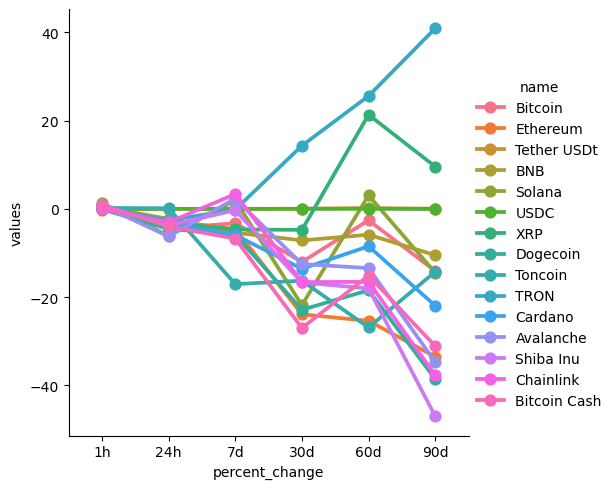

In [135]:
sns.catplot(x='percent_change', y='values', hue='name', data=df8, kind='point')

In [141]:
# simpler
# create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,59267.90434,2024-08-28 14:36:19.440311
0,Bitcoin,59267.90434,2024-08-28 14:36:25.582040
0,Bitcoin,59253.11880,2024-08-28 14:37:25.916327
0,Bitcoin,59253.11880,2024-08-28 14:38:26.149309


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

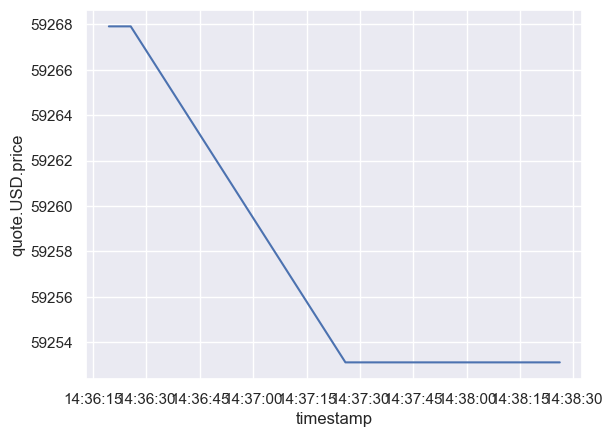

In [143]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)